In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
IMG_PATH = 'images/'
cv2.__version__

'4.1.1'

In [2]:
def open_image(img, name): 
    cv2.imshow(name, img) 
    cv2.waitKey(0)
    
def show_image(img, title):
    plt.title(title)
    plt.imshow(img, vmin=0, vmax=255)

In [3]:
img = cv2.imread(IMG_PATH + "color_balls.jpg")
print(type(img))
img.shape, 

<class 'numpy.ndarray'>


((1512, 2016, 3),)

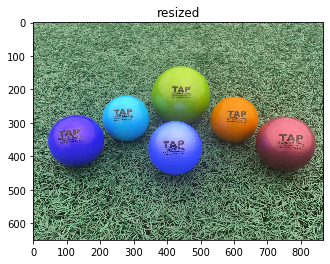

In [4]:
resized = cv2.resize(img, (0,0), fx=0.43, fy=0.43) # fx, fy --> ratio to keep or manually enter the dimensions
show_image(resized, 'resized')

In [5]:
img = resized.copy()

In [6]:
height, width = img.shape[0:2]
height, width

(650, 867)

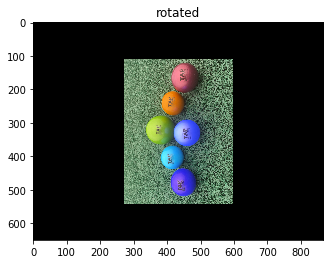

In [7]:
#---> cv2.getRotationMatrix2D(center, angle, scale)
rotationMatrix = cv2.getRotationMatrix2D((width/2, height/2), 90, .5)
rotatedImage = cv2.warpAffine(img, rotationMatrix, (width, height))
show_image(rotatedImage, 'rotated')

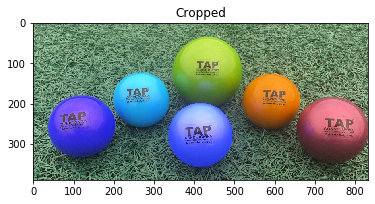

In [8]:
#---> crop, i.e remove starting and ending rows/cols of image
startRow = int(height*.15)
startCol = int(width*0.01) # start from 10% of rows/ 3% cols
endRow = int(height*.75) # end at 15% of rows/cols
endCol = int(width*.97)
croppedImage = img[startRow:endRow, startCol:endCol]
show_image(croppedImage, 'Cropped')

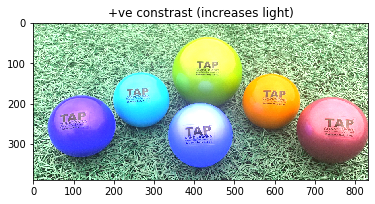

In [9]:
# new_img = a * original_img + b   ---> equation to adjust contrast (a > 0, for normal contrast a = 1) 
# & brightness (b in range -127 to +127).
# cv2.addWeighted(source_img1, alpha1, source_img2, alpha2, beta)

contrast_img = cv2.addWeighted(img, 0.5, np.zeros(img.shape, img.dtype), 0, 0)
show_image(contrast_img, '-ve constrast (increases darkness)')

contrast_img = cv2.addWeighted(croppedImage, 1.5, np.zeros(croppedImage.shape, croppedImage.dtype), 0, 0)
show_image(contrast_img, '+ve constrast (increases light)')

### Blur Images

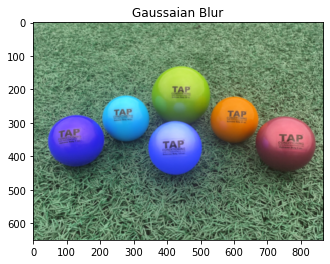

In [10]:
blur_image = cv2.GaussianBlur(img, (7,7), 0)
show_image(blur_image, 'Gaussaian Blur')

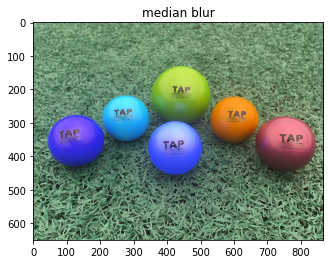

In [11]:
blur_image = cv2.medianBlur(img,5) # used when there is salt&pepper noise
show_image(blur_image, 'median blur')

### GRAY scale

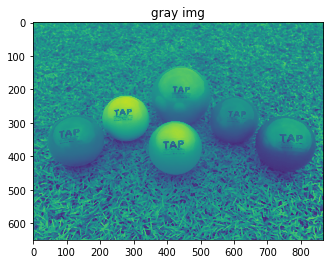

In [12]:
gray_img = cv2.cvtColor(blur_image, cv2.COLOR_BGR2GRAY)
show_image(gray_img, 'gray img')

### Edge detect

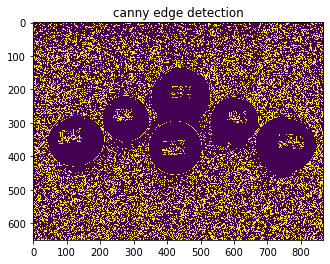

In [13]:
# cv2.Canny(image, minVal, maxVal)
edge_img = cv2.Canny(img,200,220)
show_image(edge_img, 'canny edge detection')

### Thresholding

In [ ]:
# thresh = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)[1]

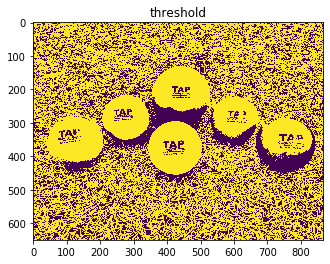

In [14]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 255, 16)
# thresh = cv2.bitwise_not(thresh)
show_image(thresh, 'threshold')

### Dilate & Erode

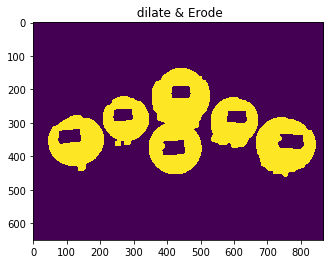

In [15]:
import matplotlib.pyplot as plt
# Dilatation et erosion
kernel = np.ones((15,15), np.uint8)
img_dilation = cv2.dilate(edge_img, kernel, iterations=1)
img_erode = cv2.erode(img_dilation,kernel, iterations=1)
# clean all noise after dilatation and erosion
img_erode = cv2.medianBlur(img_erode, 7)
img_erode = cv2.bitwise_not(img_erode)
show_image(img_erode,' dilate & Erode')

In [16]:
open_image(img_erode, 'erode')

### Countours

In [17]:
rects, hierarcy = cv2.findContours(img_erode.copy(), cv2.RETR_EXTERNAL,
                        cv2.CHAIN_APPROX_SIMPLE)
len(rects)

5

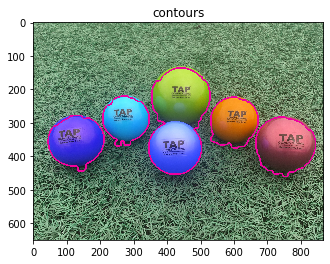

In [19]:
output = img.copy()
for c in rects:
    # draw each contour on the output image with a 3px thick purple
    # outline, then display the output contours one at a time
    cv2.drawContours(output, [c], -1, (240, 0, 159), 3)
    show_image(output, 'contours')